In [10]:
import os
import numpy as np
import glob
import pandas as pd  
#from keras import utils as np_utils
import random
import math as mp
from scipy.signal import resample

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models

%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
# generate CHBMIT non seizure samples 
# chb - all
path='/home/ad930/datasetsv4/'
dr='non_seizures'
nfilenames=[]
end='/*.csv'
nfilenames=glob.glob(path + dr + end)

def generate_chbmit_datasets(filenames):
    flag=0
    counter=0
    oldFS=256
    newFS=173.61
    arry=[]    
    for files in filenames:
        if counter==169:
            break
        df=pd.read_csv(files)
        if '\'F3-C3\'' in df:
            df = df[['\'F3-C3\'']]
            if df.shape[0] == 6041:
                newNumSamples = mp.ceil((df.shape[0] / oldFS) * newFS)
                flag=1
            if df.shape[0] == 6042:
                newNumSamples = mp.floor((df.shape[0] / oldFS) * newFS)
                flag=1
            if flag==1:
                newData = pd.DataFrame(resample(df, newNumSamples))
                arry.append(np.array(newData,dtype="float32"))
            counter=counter+1
    return np.array(arry) 

In [9]:
chb_signals_n=generate_chbmit_datasets(nfilenames)
chb_signals_n.shape

(169, 4097, 1)

In [2]:
# generate CHBMIT seizure samples 
# chb -all
path='/home/ad930/datasetsv4/'
dr='seizures'
sfilenames=[]
end='/*.csv'
sfilenames=glob.glob(path + dr + end)

def generate_chbmit_datasets(filenames):
    counter=0
    oldFS=256
    newFS=173.61
    arry=[]    
    for files in filenames:
        df=pd.read_csv(files)
        if '\'F3-C3\'' in df:
            df = df[['\'F3-C3\'']]
            if df.shape[0] == 6041:
                newNumSamples = mp.ceil((df.shape[0] / oldFS) * newFS)
                flag=1
            if df.shape[0] == 6042:
                newNumSamples = mp.floor((df.shape[0] / oldFS) * newFS)
                flag=1
            if flag==1:
                newData = pd.DataFrame(resample(df, newNumSamples))
                arry.append(np.array(newData,dtype="float32"))
    return np.array(arry) 

In [3]:
chb_signals=generate_chbmit_datasets(sfilenames)
chb_signals.shape

(169, 4097, 1)

In [11]:
scaler=StandardScaler()

In [12]:
X = chb_signals_n
XC=X
X1=X.reshape(len(X)*4097,order='F')
X2=X1.reshape(4097,len(X))

X2=scaler.fit_transform(X2)    #normalize(X2,axis=1)

X3=np.reshape(X2,4097*len(X),order='F')
X4=X3.reshape(len(X),4097,1)
X=X4
chb_signals_n = X

In [13]:
X = chb_signals
XC=X
X1=X.reshape(len(X)*4097,order='F')
X2=X1.reshape(4097,len(X))

X2=scaler.fit_transform(X2)   #normalize(X2,axis=1)

X3=np.reshape(X2,4097*len(X),order='F')
X4=X3.reshape(len(X),4097,1)
X=X4
chb_signals = X

In [14]:
X = np.append(chb_signals_n,chb_signals, axis = 0)

In [15]:
X.shape

(338, 4097, 1)

In [16]:
# 0 for non-seizure, 1 for seizure
def generate_labels(cutoff,ln):
    arry=[]
    for i in range(0,ln):
        if i>=cutoff:
            arry.append(1)  # seizure
        else:
            arry.append(0)  # non-seizure
    return np.array(arry,dtype='int64')

In [17]:
yy=generate_labels(169,338)

In [18]:
yy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
print(len(X))

338


In [20]:
yy.shape

(338,)

In [28]:
# Apply Z-score normalisation
# axis=0 is column wise, axis=1 is row wise
'''
XC=X
X1=X.reshape(len(X)*4097,order='F')
X2=X1.reshape(4097,len(X))

X2=normalize(X2,axis=1)

X3=np.reshape(X2,4097*len(X),order='F')
X4=X3.reshape(len(y),4097,1)
X=X4

#def normalise_data(data_set):
#    arry=[]
#    for i in data_set:
#        arry.append(normalize(i,axis=0))
#    return np.array(arry)
'''

"\nXC=X\nX1=X.reshape(len(X)*4097,order='F')\nX2=X1.reshape(4097,len(X))\n\nX2=normalize(X2,axis=1)\n\nX3=np.reshape(X2,4097*len(X),order='F')\nX4=X3.reshape(len(y),4097,1)\nX=X4\n\n#def normalise_data(data_set):\n#    arry=[]\n#    for i in data_set:\n#        arry.append(normalize(i,axis=0))\n#    return np.array(arry)\n"

In [21]:
#X=normalise_data(X)
X.shape

(338, 4097, 1)

In [22]:
def plot_eeg_signal(sig,lab,cnt):
    flag=True
    
    i=0
    for X,y in zip(sig,lab):
        if i<cnt and y==0:
            plt.figure(i,figsize=(30,5))
            plt.plot(X,'b')
            plt.title('Non Seizure EEG Signal')
            i=i+1
        if i==cnt:
            break
   
    j=i
    i=0
    for X,y in zip(sig,lab):
        if i<cnt and y==1:
            plt.figure(i+j,figsize=(30,5))
            plt.plot(X,'r')
            plt.title('Seizure EEG Signal')
            i=i+1
        if i==cnt:
            break
    

In [23]:
#plot_eeg_signal(X,y,5)

In [24]:
#y = tf.keras.utils.to_categorical(y, num_classes=2)

In [25]:
#y.shape

In [24]:
Xx_train, Xx_test, yy_train, yy_test = train_test_split(X, yy, test_size=0.20, random_state=42)

In [25]:
Xx_train.shape

(270, 4097, 1)

In [26]:
yy_train.shape

(270,)

In [27]:
Xx_test.shape

(68, 4097, 1)

In [28]:
yy_test.shape

(68,)

In [29]:
# Initialising the CNN
cnn = tf.keras.Sequential()

# First Convolution Layer
cnn.add(layers.Conv1D(4, 6, input_shape = (4097, 1), activation='relu'))
#cnn.add(layers.LeakyReLU(alpha=0.05))  
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling1D(pool_size = 2, strides = 2))
#cnn.add(Dropout(0.25))

# Adding a second convolutional layer
cnn.add(layers.Conv1D(4, 5,activation='relu'))  #number of output filters, kernel size
#cnn.add(layers.LeakyReLU(alpha=0.05)) 
cnn.add(layers.MaxPooling1D(pool_size = 2, strides = 2))
#cnn.add(Dropout(0.25))

# Adding a third convolutional layer
cnn.add(layers.Conv1D(10, 4, activation='relu' ))
#cnn.add(layers.LeakyReLU(alpha=0.05)) 
cnn.add(layers.MaxPooling1D(pool_size = 2, strides = 2))
#cnn.add(Dropout(0.4))

# Adding a fourth convolutional layer
cnn.add(layers.Conv1D(10, 4, activation='relu' ))
#cnn.add(layers.LeakyReLU(alpha=0.05)) 
cnn.add(layers.MaxPooling1D(pool_size = 2, strides = 2))
#cnn.add(Dropout(0.4))

# Adding a fifth convolutional layer
cnn.add(layers.Conv1D(15, 4, activation='relu' ))
#cnn.add(layers.LeakyReLU(alpha=0.05)) 
cnn.add(layers.MaxPooling1D(pool_size = 2, strides = 2))
#cnn.add(Dropout(0.4))

# Step 3 - Flattening
cnn.add(layers.Flatten())

# Step 4 - Full connection
cnn.add(layers.Dense(units = 50, activation='relu'))
#cnn.add(layers.LeakyReLU(alpha=0.05)) 
cnn.add(layers.Dropout(0.1))
cnn.add(layers.Dense(units = 20, activation='relu'))
#cnn.add(layers.LeakyReLU(alpha=0.05))
cnn.add(layers.Dense(units = 2, activation = 'softmax'))


# Compiling the CNN
cnn.compile(optimizer = tf.keras.optimizers.SGD(lr=0.01,momentum=0.3, decay=0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [30]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4092, 4)           28        
_________________________________________________________________
batch_normalization (BatchNo (None, 4092, 4)           16        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2046, 4)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2042, 4)           84        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1021, 4)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1018, 10)          170       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 509, 10)           0

In [31]:
model=cnn.fit(x=Xx_train, y=yy_train, batch_size=3, epochs=100, verbose=1,validation_data=(Xx_test,yy_test))

W0620 10:59:48.312980 140556604565248 deprecation.py:323] From /home/ad930/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 270 samples, validate on 68 samples
Epoch 1/100
270/270 [==============================] - 3s 11ms/sample - loss: 0.6856 - accuracy: 0.5333 - val_loss: 0.6782 - val_accuracy: 0.6176
Epoch 2/100
270/270 [==============================] - 1s 2ms/sample - loss: 0.6453 - accuracy: 0.6185 - val_loss: 0.6483 - val_accuracy: 0.6912
Epoch 3/100
270/270 [==============================] - 1s 2ms/sample - loss: 0.6067 - accuracy: 0.6667 - val_loss: 0.6546 - val_accuracy: 0.6471
Epoch 4/100
270/270 [==============================] - 1s 2ms/sample - loss: 0.5715 - accuracy: 0.6963 - val_loss: 0.6561 - val_accuracy: 0.6471
Epoch 5/100
270/270 [==============================] - 1s 2ms/sample - loss: 0.5277 - accuracy: 0.7519 - val_loss: 0.6280 - val_accuracy: 0.6765
Epoch 6/100
270/270 [==============================] - 1s 3ms/sample - loss: 0.4949 - accuracy: 0.7741 - val_loss: 0.6355 - val_accuracy: 0.6029
Epoch 7/100
270/270 [==============================] - 1s 3ms/sample - loss: 0.4895 

In [32]:
def plot_acc_valgraph(model,num):
    plt.figure(num)
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.legend(['Training','Validation'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')

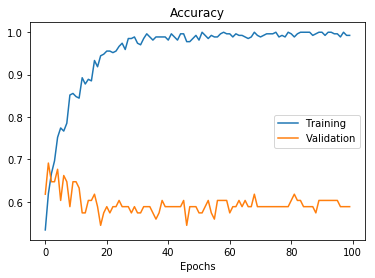

In [33]:
plot_acc_valgraph(model,1)

In [34]:
# evaluate the model
score = cnn.evaluate(Xx_test, yy_test, verbose=0)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

Test loss: 220.96357205334832
Test accuracy: 58.82353186607361


In [35]:
yy_pred=cnn.predict(x=Xx_test, verbose=1)

68/68 [==============================] - 0s 3ms/sample


In [36]:
yy_test

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0])

In [37]:
yy_pred

array([[7.0342144e-06, 9.9999297e-01],
       [9.7350061e-01, 2.6499359e-02],
       [9.9801123e-01, 1.9887830e-03],
       [9.2340237e-01, 7.6597594e-02],
       [7.9523149e-04, 9.9920481e-01],
       [8.7395507e-10, 1.0000000e+00],
       [9.6374822e-01, 3.6251772e-02],
       [6.2874467e-03, 9.9371248e-01],
       [2.1945001e-01, 7.8054994e-01],
       [8.0004770e-01, 1.9995232e-01],
       [2.9369451e-03, 9.9706310e-01],
       [8.1706202e-01, 1.8293796e-01],
       [2.5091108e-04, 9.9974912e-01],
       [2.4060801e-01, 7.5939202e-01],
       [9.9869424e-01, 1.3057819e-03],
       [1.2824635e-03, 9.9871755e-01],
       [1.0841516e-03, 9.9891591e-01],
       [7.0394933e-01, 2.9605064e-01],
       [6.6276693e-01, 3.3723307e-01],
       [3.1230059e-03, 9.9687696e-01],
       [3.1669676e-02, 9.6833032e-01],
       [9.9997699e-01, 2.2959735e-05],
       [7.0589366e-03, 9.9294102e-01],
       [9.9998772e-01, 1.2312326e-05],
       [7.5829728e-03, 9.9241698e-01],
       [9.9520159e-01, 4.

In [38]:
yy_pred1 = np.argmax(yy_pred, axis=1)

In [39]:
accuracy = accuracy_score(yy_test, yy_pred1)
print(accuracy*100)

58.82352941176471


In [40]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    # '.2f' if normalize else 
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

[[22 16]
 [12 18]]


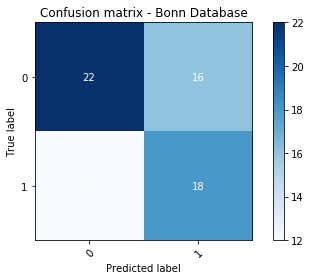

In [43]:
confusion_mat= plot_confusion_matrix(yy_test, yy_pred1, classes=[0,1], title='Confusion matrix - Bonn Database')

In [44]:
from sklearn.metrics import classification_report
print(classification_report(yy_test,yy_pred1,target_names = ['Non-Seizure(0)', 'Seizure(1)']))

                precision    recall  f1-score   support

Non-Seizure(0)       0.65      0.58      0.61        38
    Seizure(1)       0.53      0.60      0.56        30

      accuracy                           0.59        68
     macro avg       0.59      0.59      0.59        68
  weighted avg       0.60      0.59      0.59        68



In [45]:
#from tensorflow.keras.models import load_model

cnn.save('CNN_MODEL_chbmit_temp.h5')  # creates a HDF5 file 'my_model.h5'


# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

In [46]:
# load generator
from tensorflow.keras.models import load_model
gen = load_model('./GAN_Generator_model2.h5')

W0620 11:04:01.877619 140556604565248 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [47]:
# generate 100 synthetic seizure signals
signal_gen = []
for i in range(0,100):
    noise = tf.random.normal([1, 100])
    generated_signal = gen(noise, training=False)
    generated_signal = generated_signal[:,:,0,:]
    signal_gen.append(generated_signal[0])


In [48]:
signal_gen = np.array(signal_gen)

In [49]:
X = signal_gen
XC=X
X1=X.reshape(len(X)*4097,order='F')
X2=X1.reshape(4097,len(X))

X2=scaler.fit_transform(X2) #normalize(X2,axis=1)

X3=np.reshape(X2,4097*len(X),order='F')
X4=X3.reshape(len(X),4097,1)
X=X4
signal_gen = X

In [52]:
path='/home/ad930/datasetsv4/'
dr='non_seizures'
nfilenames=[]
end='/*.csv'
flag=0
nfilenames=glob.glob(path + dr + end)

def generate_chbmit_datasets(filenames):
    oldFS=256
    newFS=173.61
    arry=[]   
    counter=0
    for files in filenames:
        if counter==100:
            break
        df=pd.read_csv(files)
        if '\'F3-C3\'' in df:
            df = df[['\'F3-C3\'']]
            if df.shape[0] == 6041:
                newNumSamples = mp.ceil((df.shape[0] / oldFS) * newFS)
                flag=1
            if df.shape[0] == 6042:
                newNumSamples = mp.floor((df.shape[0] / oldFS) * newFS)
                flag=1
            if flag==1:
                newData = pd.DataFrame(resample(df, newNumSamples))
                arry.append(np.array(newData,dtype="float32"))
            counter=counter+1
     
    return np.array(arry) 

In [53]:
chb_signals=generate_chbmit_datasets(nfilenames)
chb_signals.shape

(100, 4097, 1)

In [54]:
X = chb_signals
XC=X
X1=X.reshape(len(X)*4097,order='F')
X2=X1.reshape(4097,len(X))

X2=scaler.fit_transform(X2) #normalize(X2,axis=1)

X3=np.reshape(X2,4097*len(X),order='F')
X4=X3.reshape(len(X),4097,1)
X=X4
chb_signals = X

In [144]:
'''
# Normalising synthetic signals
X = signal_gen
XC=X
X1=X.reshape(len(X)*4097,order='F')
X2=X1.reshape(4097,len(X))

X2=normalize(X2,axis=1)

X3=np.reshape(X2,4097*len(X),order='F')
X4=X3.reshape(len(X),4097,1)
X=X4
signal_gen = X
'''

"\n# Normalising synthetic signals\nX = signal_gen\nXC=X\nX1=X.reshape(len(X)*4097,order='F')\nX2=X1.reshape(4097,len(X))\n\nX2=normalize(X2,axis=1)\n\nX3=np.reshape(X2,4097*len(X),order='F')\nX4=X3.reshape(len(X),4097,1)\nX=X4\nsignal_gen = X\n"

In [55]:
x_test = np.append(signal_gen,chb_signals, axis=0)  # 1,0
x_test.shape

(200, 4097, 1)

In [56]:
x_test.shape

(200, 4097, 1)

In [57]:
y_zero = np.zeros((100,),dtype='int64')
y_ones = np.ones((100,),dtype='int64')
y_test = np.append(y_ones, y_zero, axis=0)
y_test.shape


(200,)

In [58]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [59]:
# evaluate the model
score = cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

Test loss: 202.6648708600551
Test accuracy: 46.50000035762787


In [60]:
y_pred2 = cnn.predict(x=x_test, verbose=1)

200/200 [==============================] - 0s 528us/sample


In [61]:
y_pred3 = np.argmax(y_pred2, axis=1)

In [62]:
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [63]:
accuracy = accuracy_score(y_test, y_pred3)
print(accuracy*100)

46.5


[[ 93   7]
 [100   0]]


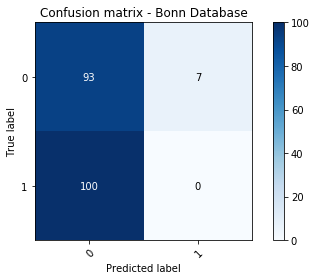

In [64]:
confusion_mat = plot_confusion_matrix(y_test, y_pred3, classes=[0,1], title='Confusion matrix - Bonn Database')

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3,target_names = ['Non-Seizure(0)', 'Seizure(1)']))

                precision    recall  f1-score   support

Non-Seizure(0)       0.48      0.93      0.63       100
    Seizure(1)       0.00      0.00      0.00       100

      accuracy                           0.47       200
     macro avg       0.24      0.47      0.32       200
  weighted avg       0.24      0.47      0.32       200

